#### Feature Engineering

This notebook is dedicated mainly for various feature enfineering techniques and how they improve our feature set. We would like to 

* Detect and Eliminate Outliers

* Normalize

* Get rid of extra features

* Detect collinearity

* Eradicate low variance features

* Get some info about the trends in our dataset

In [16]:
import pandas as pd
import numpy as np

df = pd.read_csv('dataset/train.csv')
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [17]:
df_tmp = df.select_dtypes(exclude='object')
df_tmp = df_tmp.fillna(0)
df_tmp.drop(df_tmp.columns[0], axis=1, inplace=True)
df_tmp.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


###### Ananlysing the dataframe

Pandas comes with an amazing library which profiles the whole data frame and presents with a complete analysis of all the fields with information such as missing values, number of zeros, correlation between 2 columns, and interactions.

We'll use this analysis for various purposes - fill in the missing values, get rid of colinear features, look out for features which has no bearing on the sales price to reduce the dimensionality etc.

In [18]:
# from pandas_profiling import ProfileReport
# prof = ProfileReport(df_tmp)
# prof.to_file(output_file='profile.html')

#### Handling Outliers

It is a good practice to identify the outliers in the data and get rid of them. They hold the potential to mess up the fine tuning of your model. There are 2 ways to identify the outliers - visually and statistically. Visual methods tend to me more accurate whereas statistical methods are faster. We will explore both.

###### Boxplots and Statistical Methods

Box plot is one of the visual aids to identify the outliers. They give a picture of the distribution of data. The boundaries marked are the interquartile range (between 25th (Q1) and 75th (Q3) percentile) and the maximum (Q3 + 1.5xIQR) and the minimum (Q1 - 1.5xIQR). IQR is the interquartile range of a data (Q3 - Q1). It gives dispersion of the data and is more robust against the outliers compared to its counterpart 'Z Score'.

The quantile or Z score method seem to be suitable only for fields related to area. Some of the fields have counts (kitchen count, pool count, bsmt count etc.) in them and including them in identifying the outliers would be disastrous. Majority of the values in these fields are zeros and all the others would be considered as outliers. 

In [19]:
import seaborn as sns

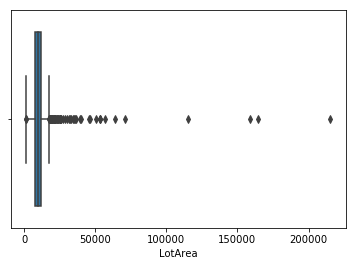

In [20]:
#Seems viable to identify outliers in LotArea
sns.boxplot(x=df_tmp['LotArea'])

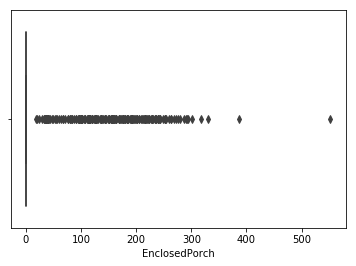

In [21]:
#All the non zero values would be considered as outliers in EnclosedPorch
sns.boxplot(x=df_tmp['EnclosedPorch'])

###### Below is the implementation for getting rid of outliers using IQR

In [22]:
#Calculating IQR for each feature
q1 = df_tmp.quantile(0.25)
q3 = df_tmp.quantile(0.75)
q3 - q1

MSSubClass          50.00
LotFrontage         37.00
LotArea           4048.00
OverallQual          2.00
OverallCond          1.00
YearBuilt           46.00
YearRemodAdd        37.00
MasVnrArea         164.25
BsmtFinSF1         712.25
BsmtFinSF2           0.00
BsmtUnfSF          585.00
TotalBsmtSF        502.50
1stFlrSF           509.25
2ndFlrSF           728.00
LowQualFinSF         0.00
GrLivArea          647.25
BsmtFullBath         1.00
BsmtHalfBath         0.00
FullBath             1.00
HalfBath             1.00
BedroomAbvGr         1.00
KitchenAbvGr         0.00
TotRmsAbvGrd         2.00
Fireplaces           1.00
GarageYrBlt         43.00
GarageCars           1.00
GarageArea         241.50
WoodDeckSF         168.00
OpenPorchSF         68.00
EnclosedPorch        0.00
3SsnPorch            0.00
ScreenPorch          0.00
PoolArea             0.00
MiscVal              0.00
MoSold               3.00
YrSold               2.00
SalePrice        84025.00
dtype: float64

In [23]:
from scipy import stats

In [24]:
#Selecting fields to which applying the IQR would be meaningful
df_apply_iqr = df_tmp[['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF']]

In [25]:
q1 = df_apply_iqr.quantile(0.25)
q3 = df_apply_iqr.quantile(0.75)
iqr = q3 - q1
iqr

LotArea        4048.00
MasVnrArea      164.25
BsmtFinSF1      712.25
BsmtUnfSF       585.00
TotalBsmtSF     502.50
1stFlrSF        509.25
2ndFlrSF        728.00
GarageArea      241.50
WoodDeckSF      168.00
OpenPorchSF      68.00
dtype: float64

In [26]:
#Forming a new dataframe with outliers removed
df_temp_out = df_tmp[~((df_tmp < (q1 - 1.5 * iqr)) |(df_tmp > (q3 + 1.5 * iqr))).any(axis=1)]

In [27]:
df_temp_out.shape, df_tmp.shape

((1154, 37), (1460, 37))

In [28]:
df_temp_out.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


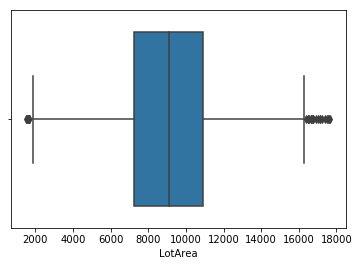

In [29]:
sns.boxplot(x=df_temp_out['LotArea'])

###### Below is the implementation of removing outliers using Z score

In [30]:
df_apply_z = df_temp_out[['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF']]

In [31]:
z = np.abs(stats.zscore(df_apply_z))
z[np.isnan(z)] = 0
df_temp_z = df_temp_out[(z<3).all(axis=1)]
df_temp_z.to_csv("dataset/train_zscore.csv")

In [32]:
df_temp_z.shape, df_temp_out.shape

((1122, 37), (1154, 37))